In [4]:
import climdata
import pandas as pd
import xarray as xr

# cfg_cmip, filename_cmip, ds_cmip = climdata.extract_data(
#     overrides=[
#             "dataset=cmip",
#             "experiment_id=historical",
#             "source_id=MIROC6",
#             "variables=[tas,tasmin,tasmax,pr,rsds,sfcWind]",
#             "table_id=day",
#             "data_dir=./data",
#             f"time_range.start_date=1989-01-01",
#             f"time_range.end_date=2020-12-31",
#             "bounds.custom={lat_min:35,lat_max:71,lon_min:-10,lon_max:31}",
#             "region=custom",
#     ]
# )

from concurrent.futures import ProcessPoolExecutor
import climdata

def extract_one(year):
    cfg, filename, ds = climdata.extract_data(
        overrides=[
            "dataset=mswx",
            "variables=[tas,tasmin,tasmax,pr,rsds]",
            "table_id=day",
            "data_dir=/beegfs/muduchuru/data",
            f"time_range.start_date={year}-01-01",
            f"time_range.end_date={year}-12-31",
            "bounds.custom={lat_min:35,lat_max:71,lon_min:-10,lon_max:31}",
            "region=custom",
            "dsinfo.mswx.params.google_service_account=/home/muduchuru/.climdata_conf/service.json",
        ]
    )
    return filename

variables = ["tas", "tasmin", "tasmax", "pr", "rsds"]
years = list(range(2020, 2021))

with ProcessPoolExecutor(max_workers=1) as exe:
    results = list(exe.map(extract_one, years))

print(results)


../../usecase/conf
✅ All 366 tas files already exist locally.
✅ All 366 tasmin files already exist locally.
✅ All 366 tasmax files already exist locally.
✅ All 366 pr files already exist locally.
✅ All 366 rsds files already exist locally.
✅ Saved output to mswx_surface_LAT35-71_LON-10-31_20200101_20201231.nc
['mswx_surface_LAT35-71_LON-10-31_20200101_20201231.nc']


In [1]:
import climdata
import pandas as pd
import xarray as xr
cfg_dwd, filename_dwd, ds_dwd = climdata.extract_data(
    overrides=[
            "dataset=dwd",
            "variables=[tas,tasmin,tasmax,pr,rsds,sfcWind]",
            "table_id=day",
            "data_dir=./data",
            f"time_range.start_date=1989-01-01",
            f"time_range.end_date=2020-12-31",
            "bounds.custom={lat_min:35,lat_max:71,lon_min:-10,lon_max:31}",
            "region=custom",
    ]
)

../../../../../../../../Documents/ZALF/work/codes/climdata/usecase/conf


NameError: name 'lat' is not defined

In [12]:
import os
from hydra import initialize, compose
from omegaconf import DictConfig
from climdata.utils.utils_download import get_output_filename

overrides=[
        "dataset=dwd",
        "variables=[tas]",
        "data_dir=./data",
        f"time_range.start_date=1989-01-01",
        f"time_range.end_date=2020-12-31",
        "bounds.custom={lat_min:47,lat_max:55,lon_min:5,lon_max:16}",
        "region=custom",
]
# conf_dir = climdata.utils.config._ensure_local_conf()  # copies conf/ to cwd
# rel_conf_dir = os.path.relpath(conf_dir, os.path.dirname(__file__))
# print(rel_conf_dir)
# 2. Initialize Hydra only if not already initialized
# if not GlobalHydra.instance().is_initialized():
hydra_context = initialize(config_path='conf', version_base=None)
# else:
# If already initialized, just set context to None for clarity
# hydra_context = None

# Use compose within context manager if newly initialized
cfg_name = 'config.yaml'
if hydra_context is not None:
    with hydra_context:
        cfg: DictConfig = compose(config_name=cfg_name, overrides=overrides)
else:
    # Already initialized: compose directly
    cfg: DictConfig = compose(config_name=cfg_name, overrides=overrides)
extract_kwargs = {}
filename = None
# Determine extraction type
if cfg.lat is not None and cfg.lon is not None:
    extract_kwargs["point"] = (cfg.lon, cfg.lat)
    filename = get_output_filename(cfg, output_type="csv", lat=cfg.lat, lon=cfg.lon)
elif cfg.region is not None:
    extract_kwargs["box"] = cfg.bounds[cfg.region]
    filename = get_output_filename(cfg, output_type="nc")
elif cfg.shapefile is not None:
    extract_kwargs["shapefile"] = cfg.shapefile
    filename = get_output_filename(cfg, output_type="nc", shp_name=cfg.shp_name)

dataset_upper = cfg.dataset.upper()

ds_vars = []
for var in cfg.variables:
    dwd = climdata.DWD(cfg)
    # lat_val, lon_val = lat, lon
    extract_kwargs['variable'] = var
    extract_kwargs["buffer_km"] = 50
    ds = dwd.extract(**extract_kwargs)
    # dwd.format(var, lat_val, lon_val)
    ds_vars.append(ds)
ds = xr.merge(ds_vars)

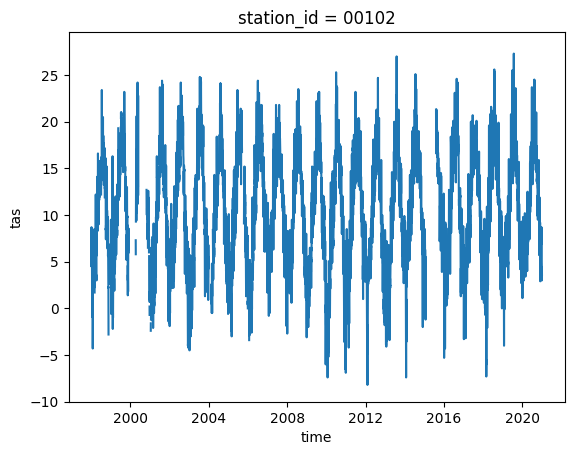

In [31]:
import numpy as np
# np.where(ds['quality_tas']<9)
ds.isel(station_id=9)['tas'].plot()

In [ ]:
path_bonn_weather = "/beegfs/common/data/climate/dwd/csvs/germany_ubn_1951-01-01_to_2024-08-30/1/daily_mean_RES1_C180R1.csv.gz"
df_bonn_weather = pd.read_csv(path_bonn_weather, sep='\s+', compression="gzip")



In [5]:
df_bonn_weather

,Date,Precipitation,TempMin,TempMean,TempMax,Radiation,SunshineDuration,SoilMoisture,SoilTemperature,Windspeed,RefETcalc,RefETdwd,RelHumCalc,Gridcell
0,1951-01-01,1.4,-7.5,-2.4,1.1,1313,0.0,-999.0,-999.0,2.7,0.7,-999.0,69,C_180:R_1
1,1951-01-02,3.8,-1.3,0.1,1.2,1326,0.0,-999.0,-999.0,2.5,0.4,-999.0,87,C_180:R_1
2,1951-01-03,0.3,-0.7,1.1,2.3,1340,0.0,-999.0,-999.0,1.8,0.4,-999.0,86,C_180:R_1
3,1951-01-04,2.4,-0.2,1.5,3.2,1396,0.1,-999.0,-999.0,2.6,0.5,-999.0,85,C_180:R_1
4,1951-01-05,12.1,1.0,3.0,4.3,1372,0.0,-999.0,-999.0,3.1,0.5,-999.0,85,C_180:R_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26901,2024-08-26,0.5,15.6,17.8,19.3,13450,4.6,75.0,17.9,1.6,2.3,2.0,86,C_180:R_1
26902,2024-08-27,0.0,15.7,19.0,22.0,22687,12.4,73.0,20.4,1.7,3.7,2.8,79,C_180:R_1
26903,2024-08-28,0.0,16.2,20.3,25.3,23236,13.0,71.0,21.6,1.8,4.2,3.1,72,C_180:R_1
26904,2024-08-29,0.0,15.5,19.8,25.4,16898,7.8,70.0,22.3,1.6,3.4,2.4,70,C_180:R_1
